<a href="https://colab.research.google.com/github/C110181106/NKUST_C110181106/blob/main/%E3%80%8C%E6%9C%9F%E4%B8%AD%E5%A0%B1%E5%91%8A_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 中文處理
import matplotlib as mpl
import matplotlib.font_manager as fm

!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"

fm.fontManager.addfont('SimHei.ttf')
mpl.rc('font', family='SimHei')
# 這一行能讓字體變得清晰
%config InlineBackend.figure_format = 'retina'
!pip install scikit-learn==1.1.3

--2024-04-14 08:03:47--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3037::6815:17f, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  34.8MB/s    in 0.3s    

2024-04-14 08:03:47 (34.8 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
replace chinese.simhei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chinese.simhei.ttf      
replace SimHei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace SimHei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: SimHei.ttf              
replace sharefonts.net.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sharefonts.net.txt      


In [ ]:
## 基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
# 資料模組
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()



In [ ]:
print(breast.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print('\n'.join(breast['DESCR'].split('\n')[:26]))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
print(breast['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df = pd.DataFrame(breast['data'], columns = breast['feature_names'])

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['target'] = breast['target']
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: ylabel='Frequency'>

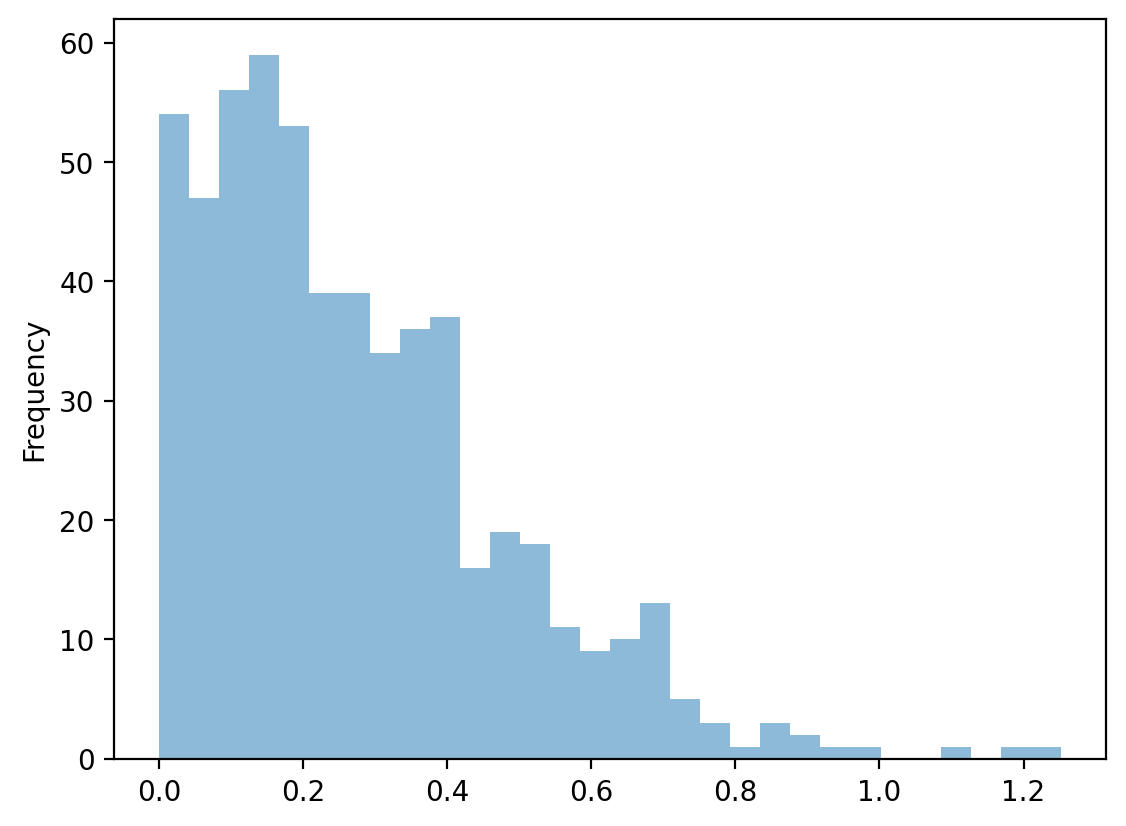

In [ ]:
df['worst concavity'].plot(kind='hist', bins=30, alpha=0.5)


In [ ]:
corr = df.corr()
corr


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


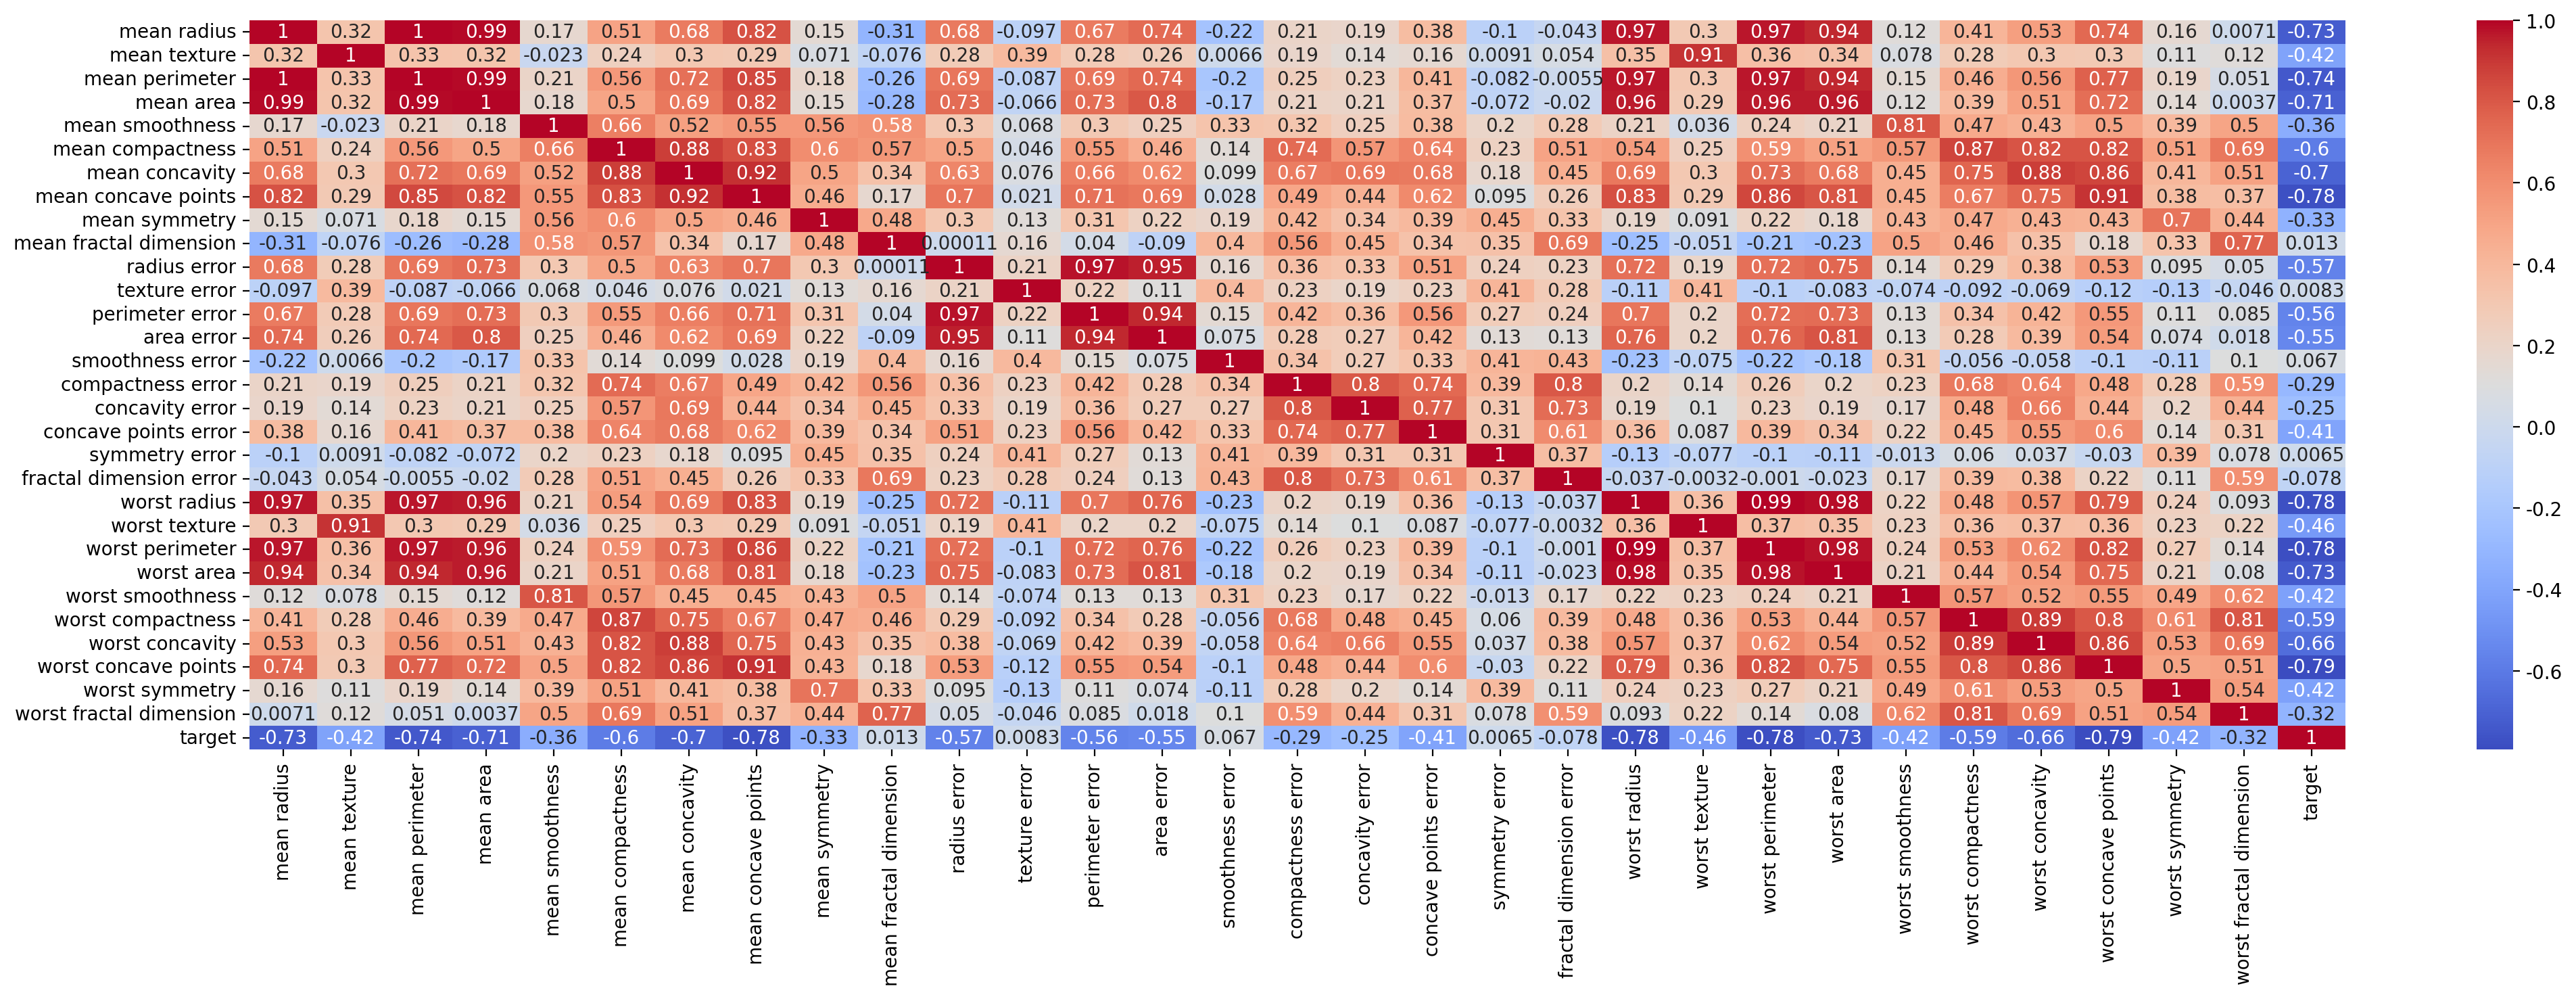

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,7))

sns.heatmap(corr, annot=True, cmap='coolwarm');

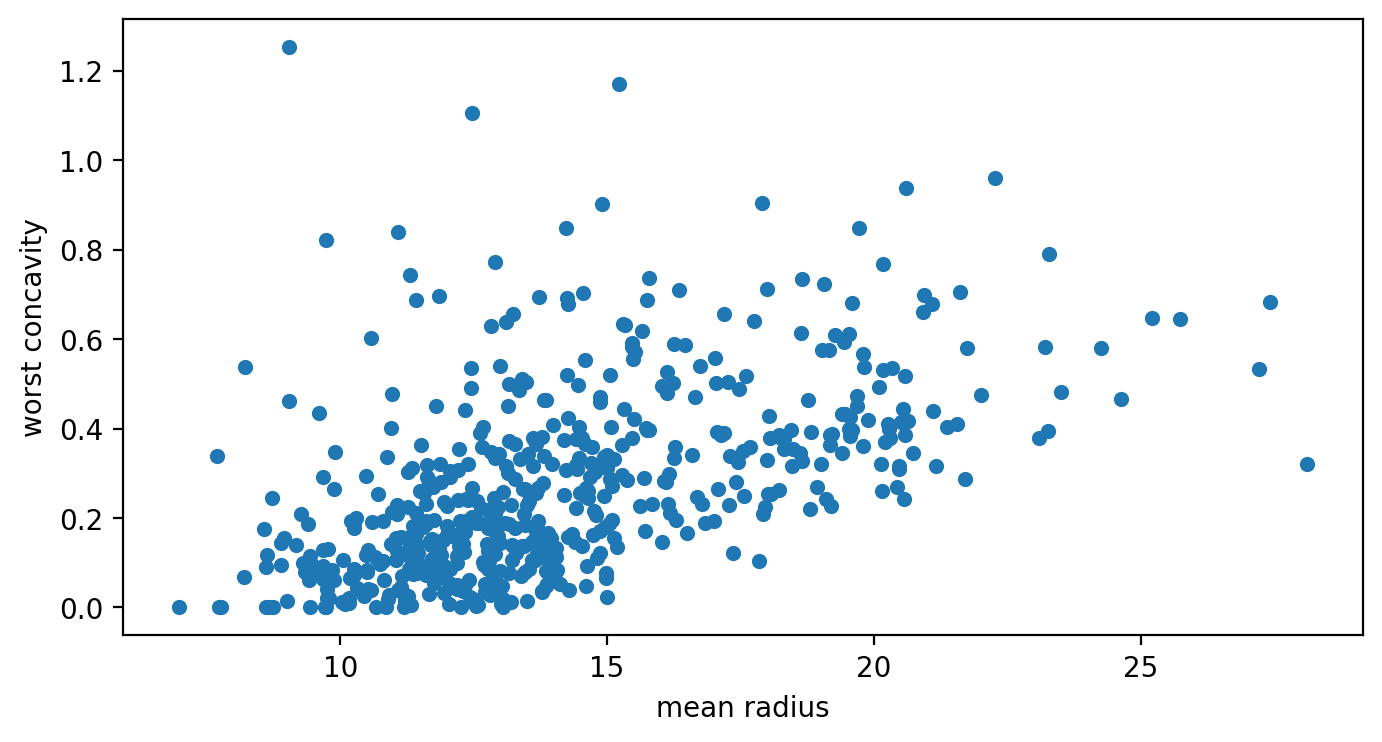

In [ ]:
df.plot(kind='scatter', x='mean radius', y='worst concavity', alpha=1, figsize=(8,4));

In [ ]:
X = df[['mean radius']]
y = df['worst concavity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
print('訓練集的筆數：',len(X_train))
print('測試集的筆數：',len(X_test))
print('測試集所佔全部資料的百分比：',len(X_test)/len(X))

訓練集的筆數： 381
測試集的筆數： 188
測試集所佔全部資料的百分比： 0.3304042179261863


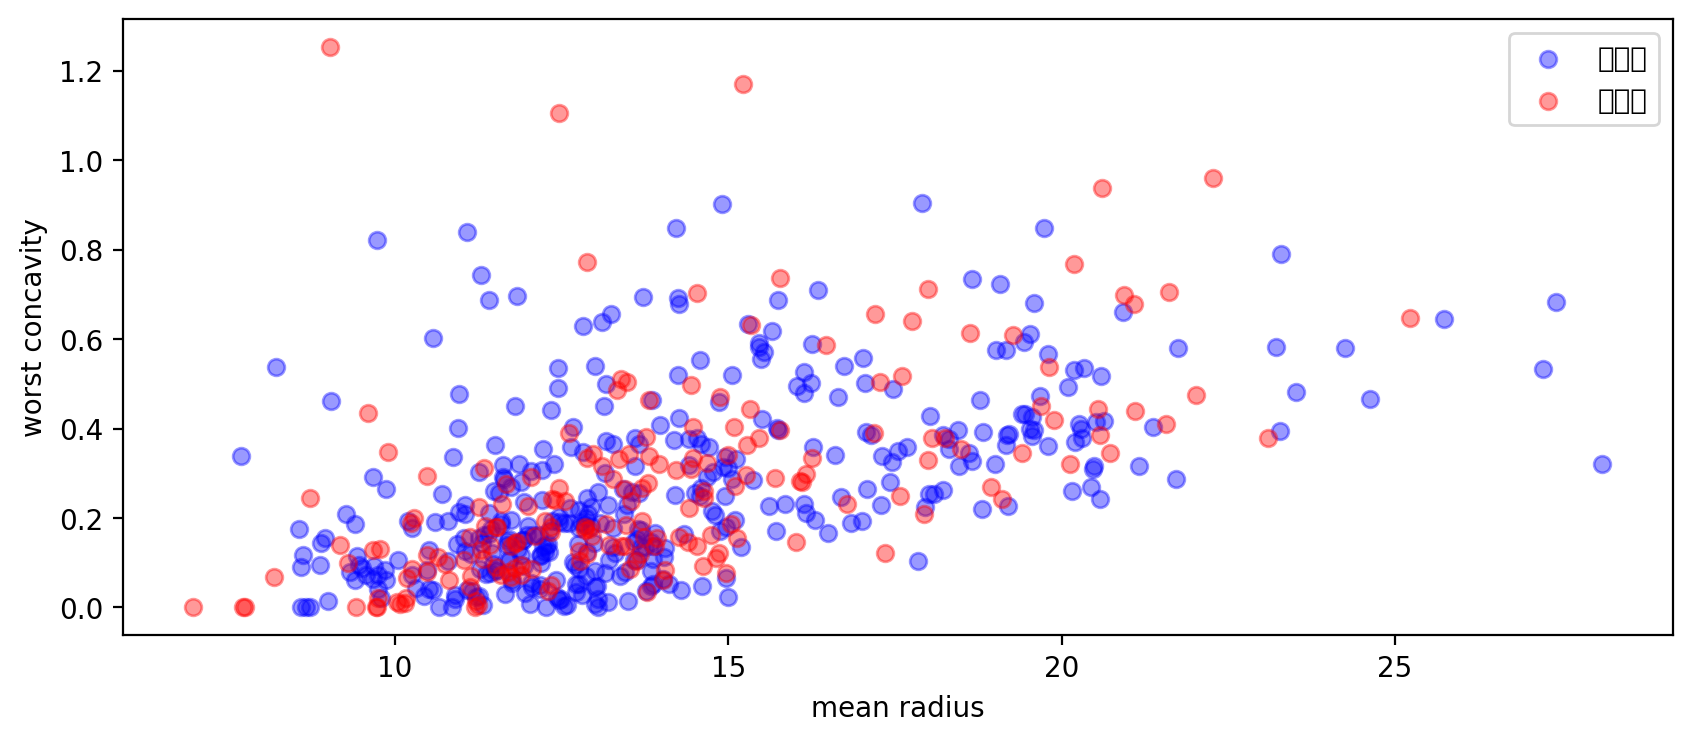

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(X_train, y_train, color='blue', alpha=0.4, label='訓練集')
ax.scatter(X_test, y_test, color='red', alpha=0.4, label='測試集')
ax.set_xlabel('mean radius')
ax.set_ylabel('worst concavity')
ax.legend();

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import HuberRegressor, Ridge
model = LinearRegression()
model_svr =svm.SVR()
model.fit(X_train, y_train)
model_svr.fit(X_train, y_train)
huber = HuberRegressor(alpha=0.0)
huber.fit(X_train, y_train)

HuberRegressor(alpha=0.0)

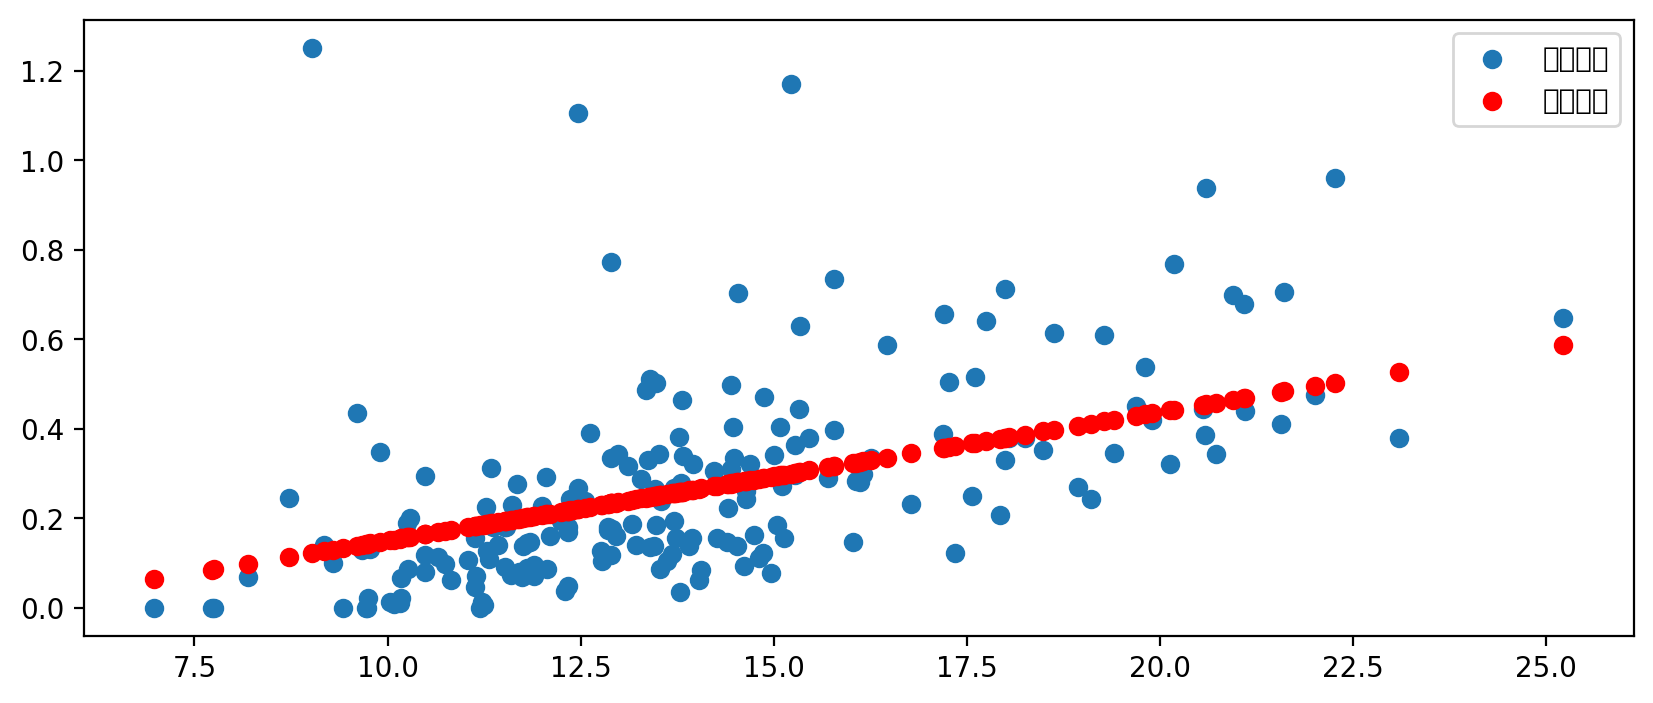

In [ ]:
y_pred=model.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_pred, c='r', label='預測結果')
plt.legend()

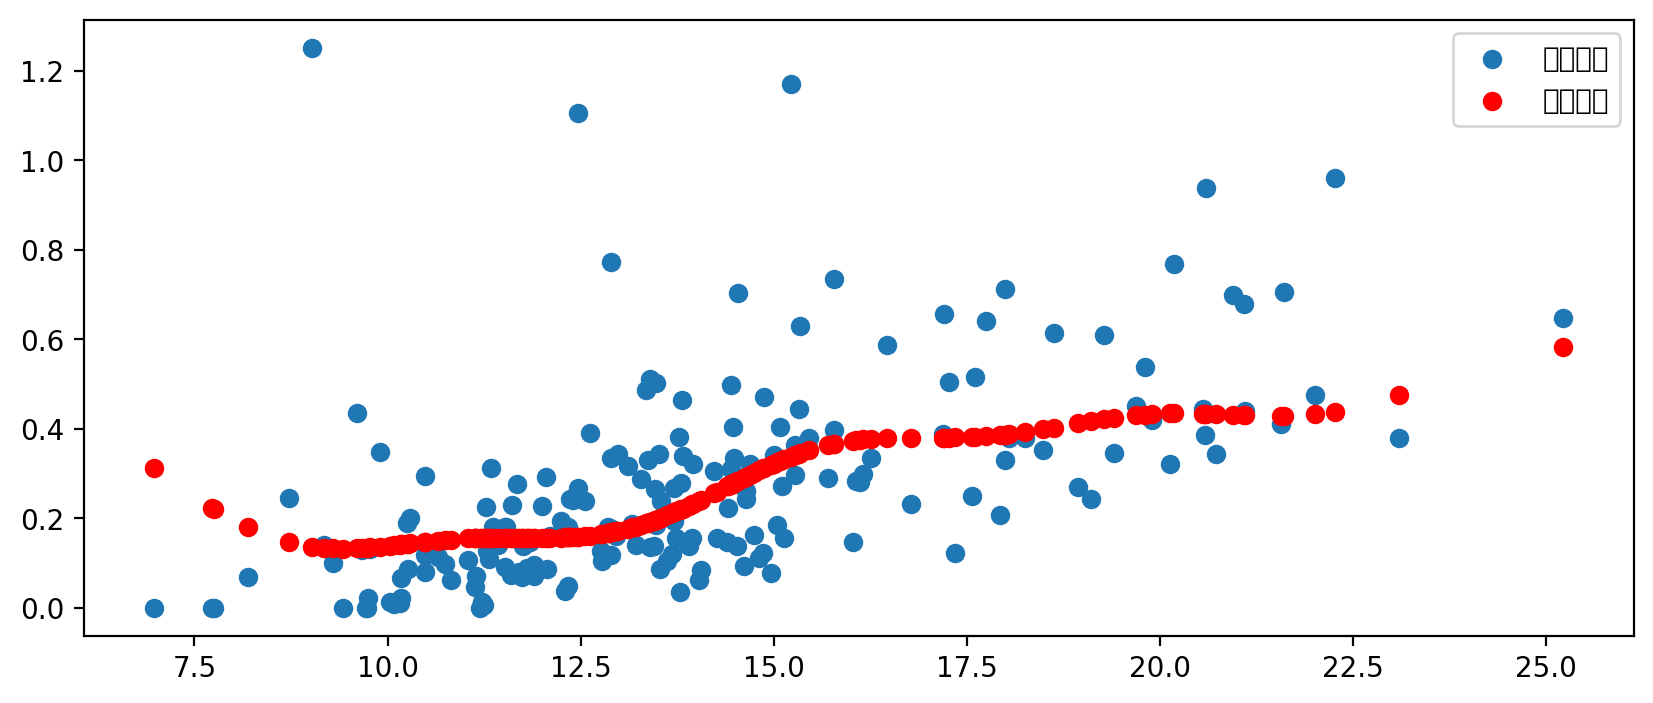

In [ ]:
y_pred_svr=model_svr.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_pred_svr, c='r', label='預測結果')
plt.legend()

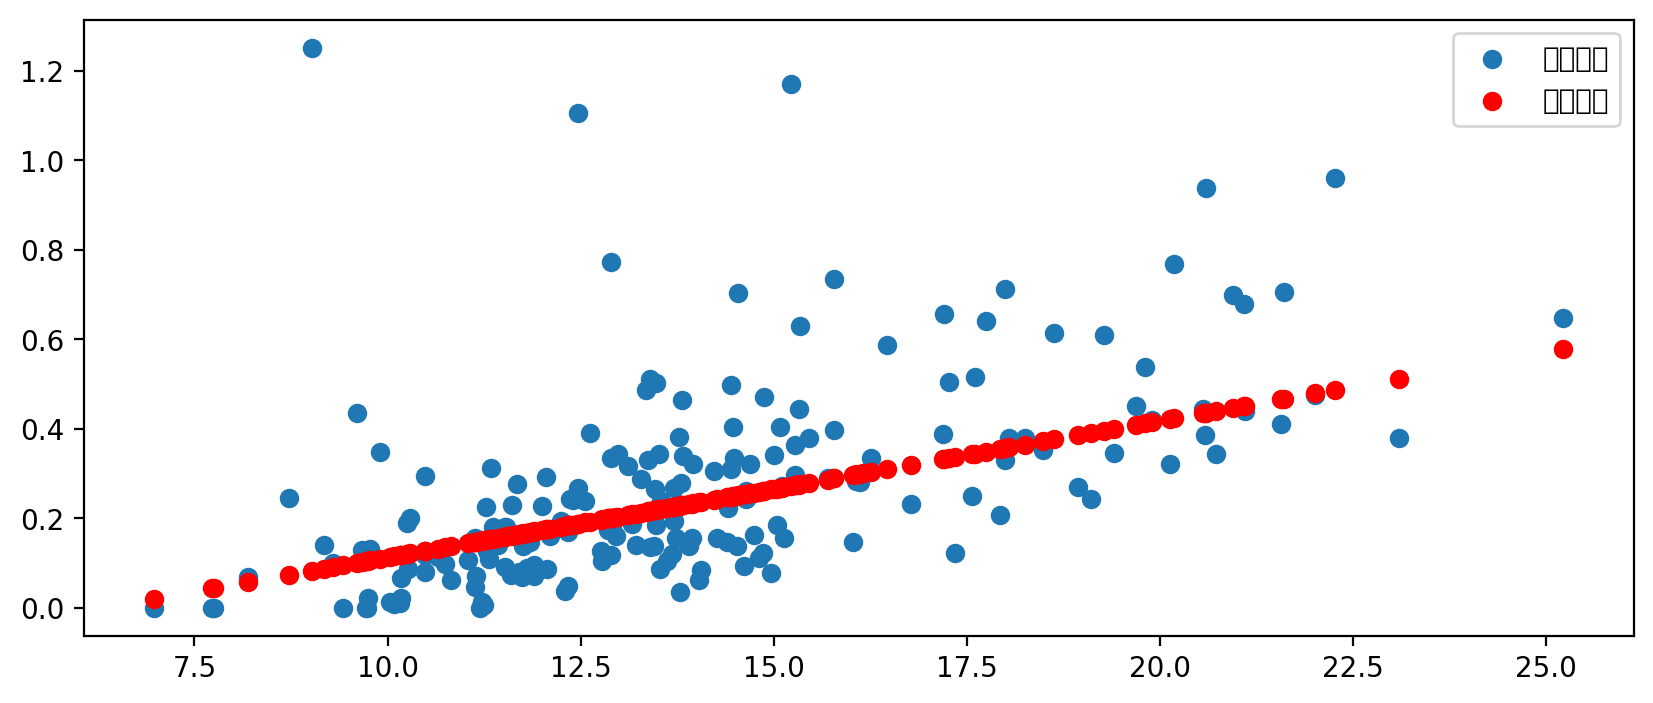

In [ ]:
y_huber=huber.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_huber, c='r', label='預測結果')
plt.legend()

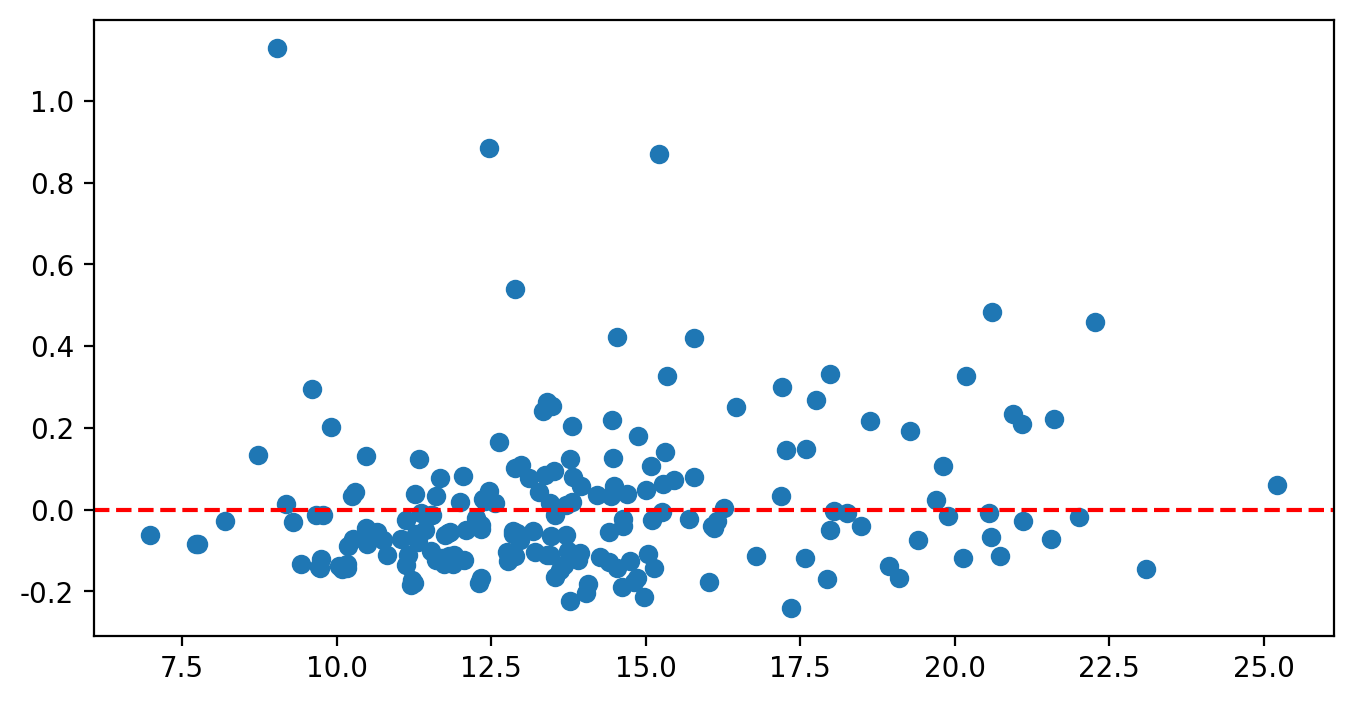

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_pred)
plt.axhline(0, c='r', ls='--');

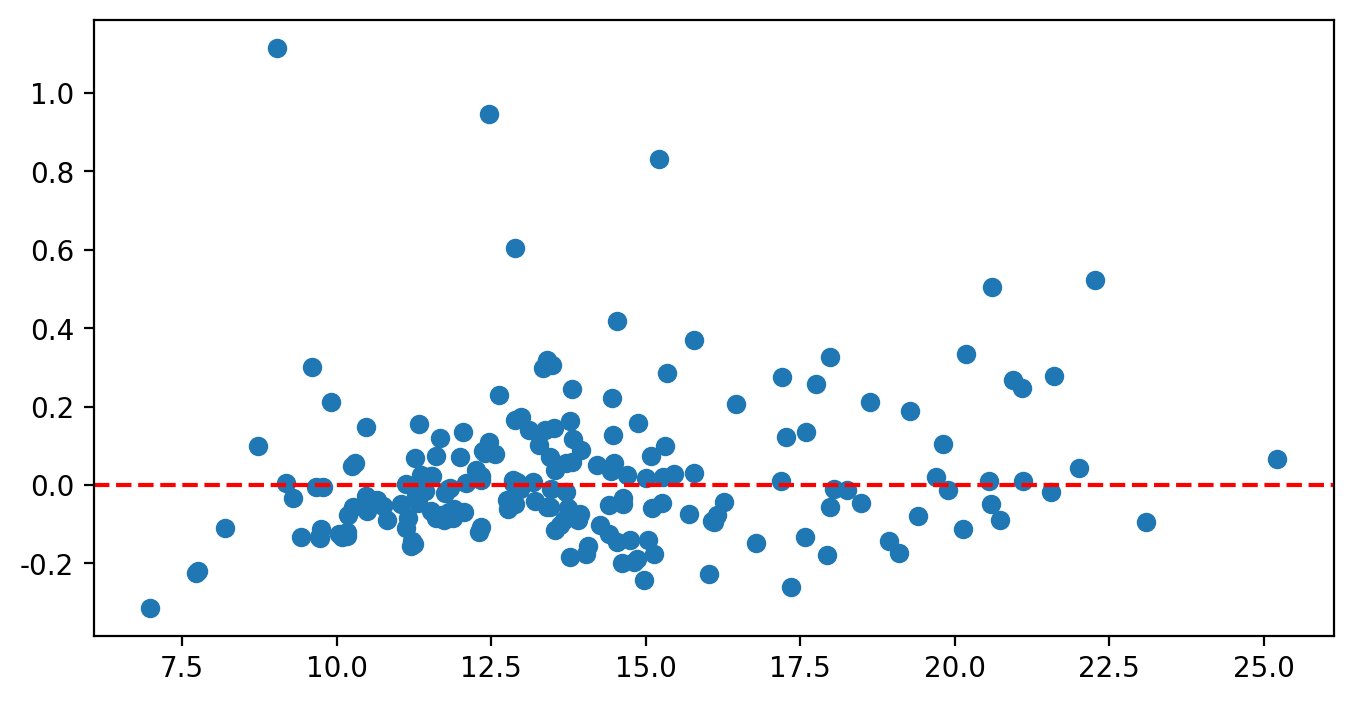

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_pred_svr)
plt.axhline(0, c='r', ls='--');

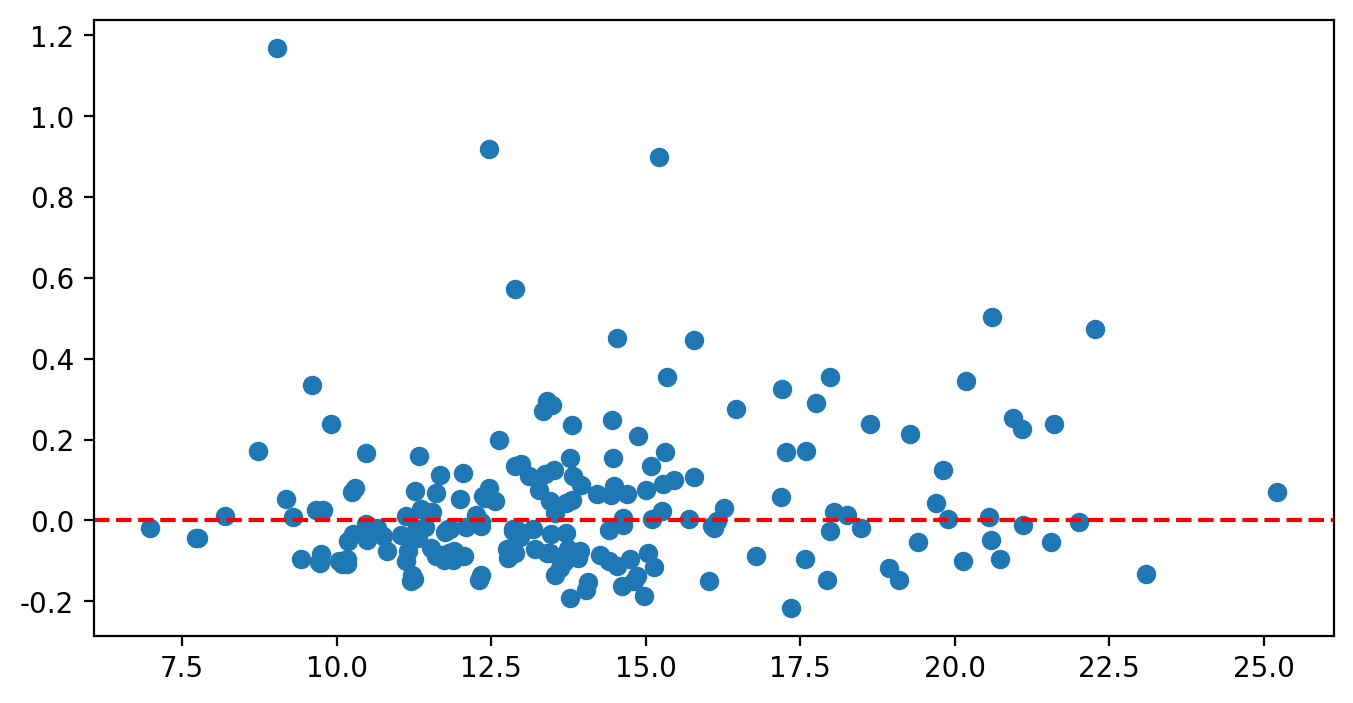

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_huber)
plt.axhline(0, c='r', ls='--');

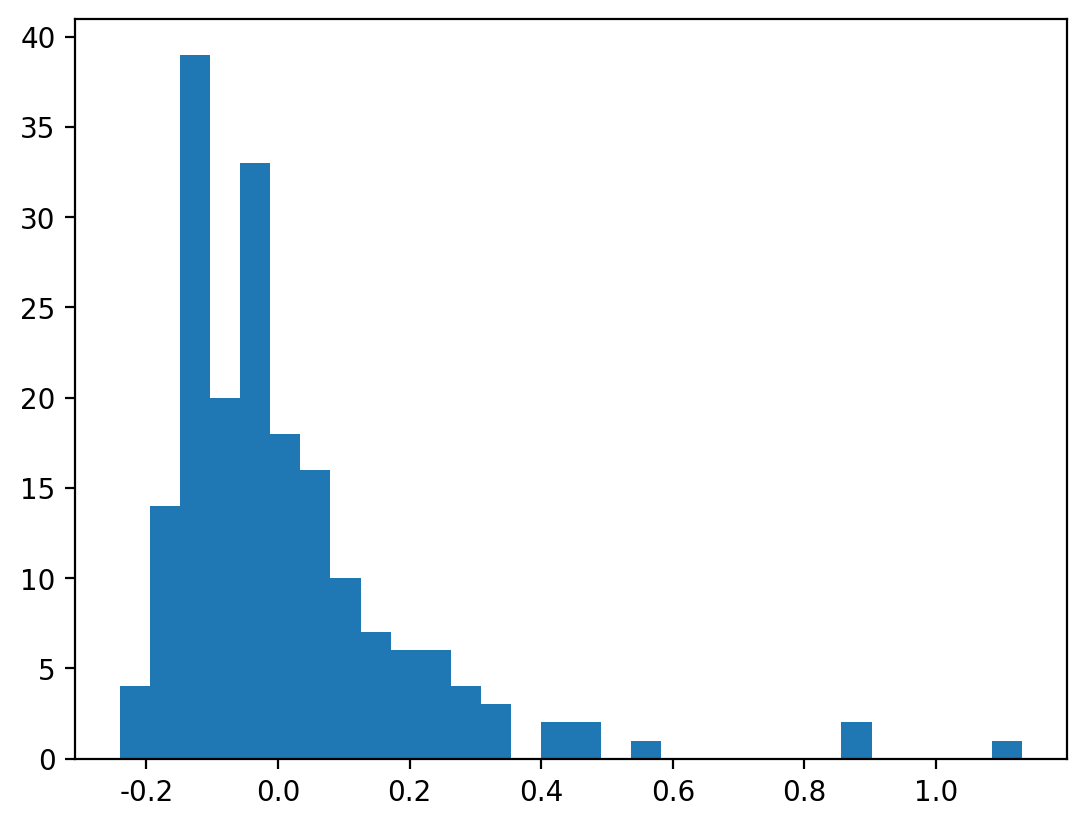

In [ ]:
plt.hist(y_test-y_pred, bins=30);

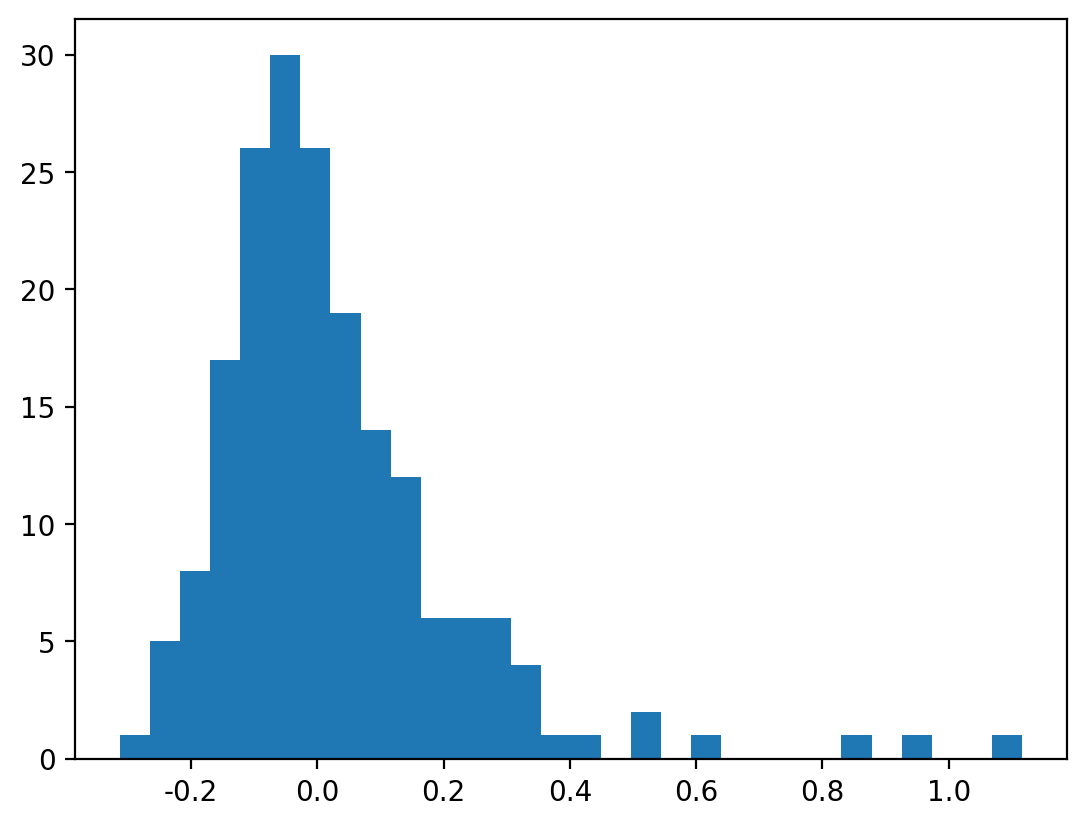

In [ ]:
plt.hist(y_test-y_pred_svr, bins=30);

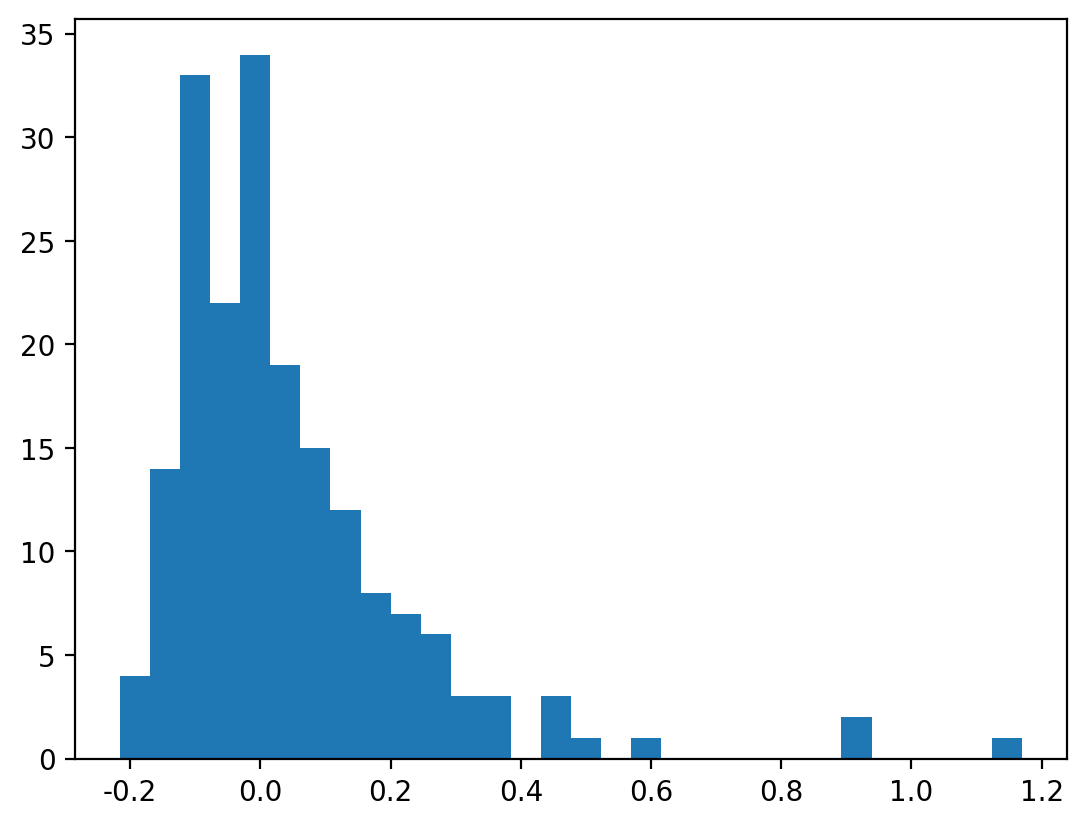

In [ ]:
plt.hist(y_test-y_huber, bins=30);

In [ ]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test['y_pred'] = y_pred
df_test['error'] = df_test['worst concavity']-df_test['y_pred']
df_test['error_abs'] = np.abs(df_test['error'])
df_test.sort_values(by='error_abs', ascending=False, inplace=True)
df_test.head()

,mean radius,worst concavity,y_pred,error,error_abs
68,9.029,1.2520,0.121708,1.130292,1.130292
9,12.460,1.1050,0.220353,0.884647,0.884647
562,15.220,1.1700,0.299705,0.870295,0.870295
247,12.890,0.7727,0.232715,0.539985,0.539985
567,20.600,0.9387,0.454384,0.484316,0.484316


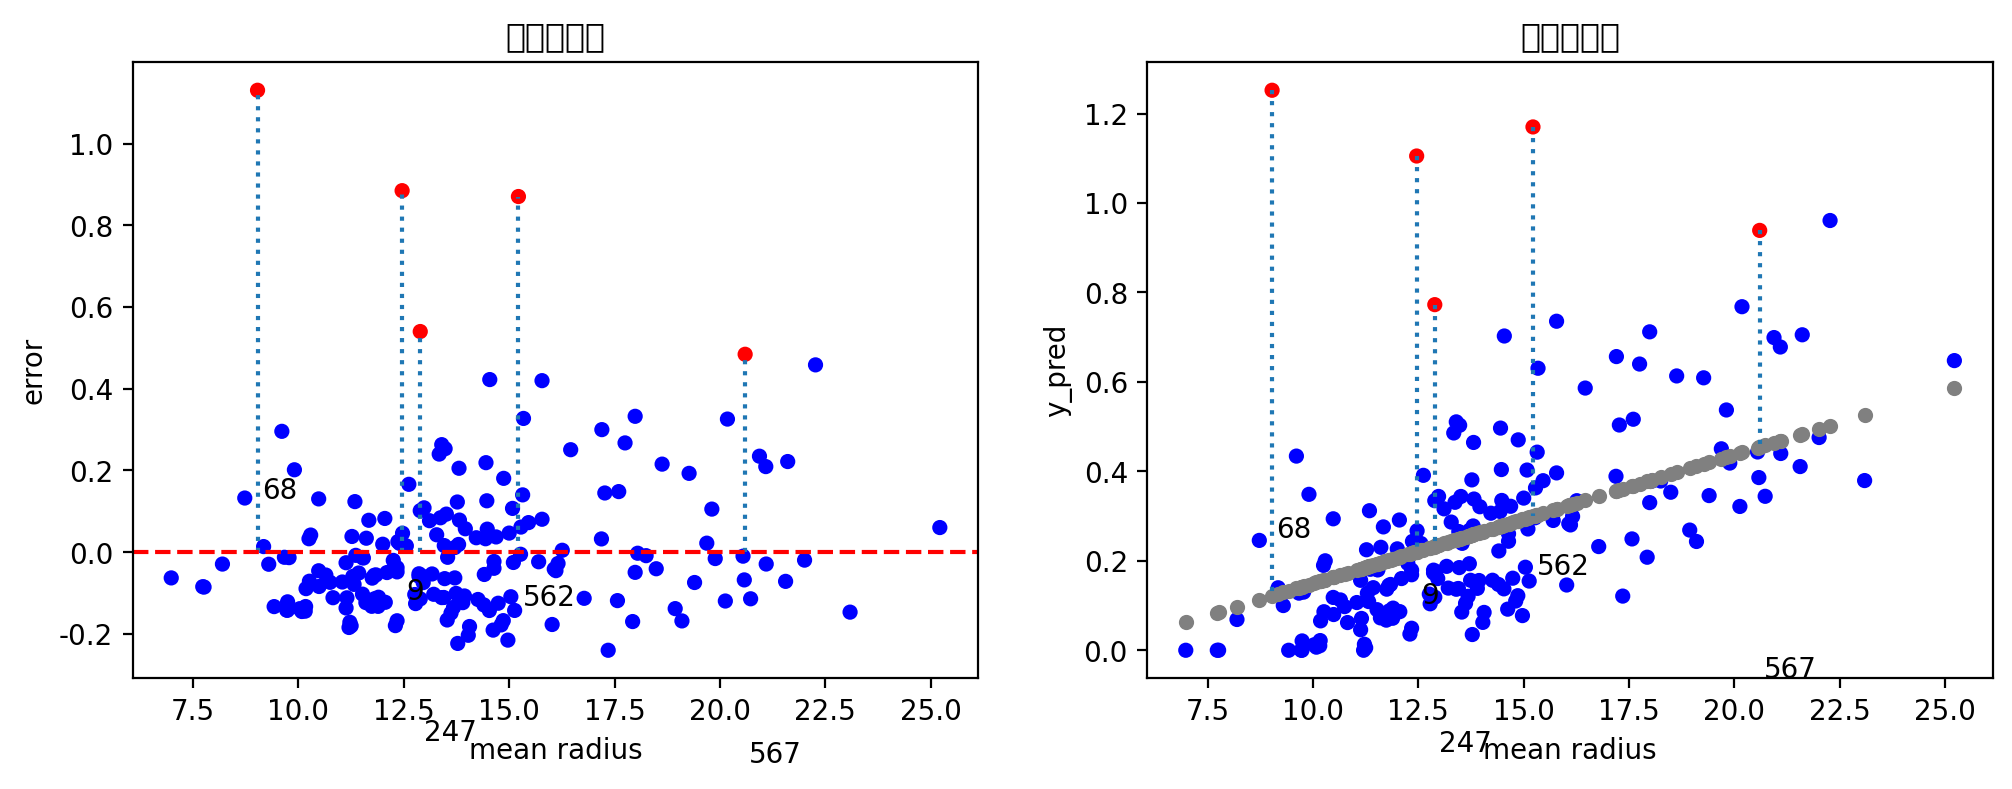

In [ ]:
colors = ['red']*5 + ['blue']*(len(df_test)-5)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
# 第一張圖
ax = axes[0]
df_test.plot(kind='scatter', x='mean radius', y='error', c=colors, ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'mean radius']+0.1, y=df_test.loc[i,'error']-1, s=i)
    ax.vlines(x=df_test.loc[i,'mean radius'], ymin=0, ymax=df_test.loc[i,'error'], ls=':')
ax.axhline(0, c='r', ls='--')
ax.set_title('殘差值分佈')
# plot_chinese(ax)

# 第二張圖
ax = axes[1]
df_test.plot(kind='scatter', x='mean radius', y='worst concavity', c=colors, ax=ax)
df_test.plot(kind='scatter', x='mean radius', y='y_pred', c='gray', ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'mean radius']+0.1, y=df_test.loc[i,'worst concavity']-1, s=i)
    ax.vlines(x=df_test.loc[i,'mean radius'],
              ymin=df_test.loc[i,'worst concavity'], ymax=df_test.loc[i,'y_pred'], ls=':')
ax.set_title('實際值分佈');
# plot_chinese(ax)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 0.036314085926906624
Mean Absolute Error: 0.1273762185213384
R2 Score: 0.2887266529082465


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred_svr))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svr))
print('R2 Score:', r2_score(y_test, y_pred_svr))

Mean Squred Error: 0.03803727359428404
Mean Absolute Error: 0.12783340244733077
R2 Score: 0.25497508162238824


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_huber))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_huber))
print('R2 Score:', r2_score(y_test, y_huber))

Mean Squred Error: 0.03765052539259968
Mean Absolute Error: 0.1225099430407351
R2 Score: 0.2625502051831863


In [ ]:
model.predict([[6]])

array([0.03462203])

In [ ]:
model.intercept_+ model.coef_*6

array([0.03462203])

In [ ]:
X_train['mean radius1'] = X_train['mean radius']**2
X_test['mean radius1'] = X_test['mean radius']**2
X_train.head()

,mean radius,mean radius1
172,15.46,239.0116
407,12.85,165.1225
56,19.21,369.0241
497,12.47,155.5009
301,12.46,155.2516


In [ ]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 0.03631014628072277
Mean Absolute Error: 0.1265803327285954
R2 Score: 0.28880381760222185


In [ ]:

model_2.intercept_, model_2.coef_

(-0.24736071521469988, array([ 0.04334482, -0.00045573]))

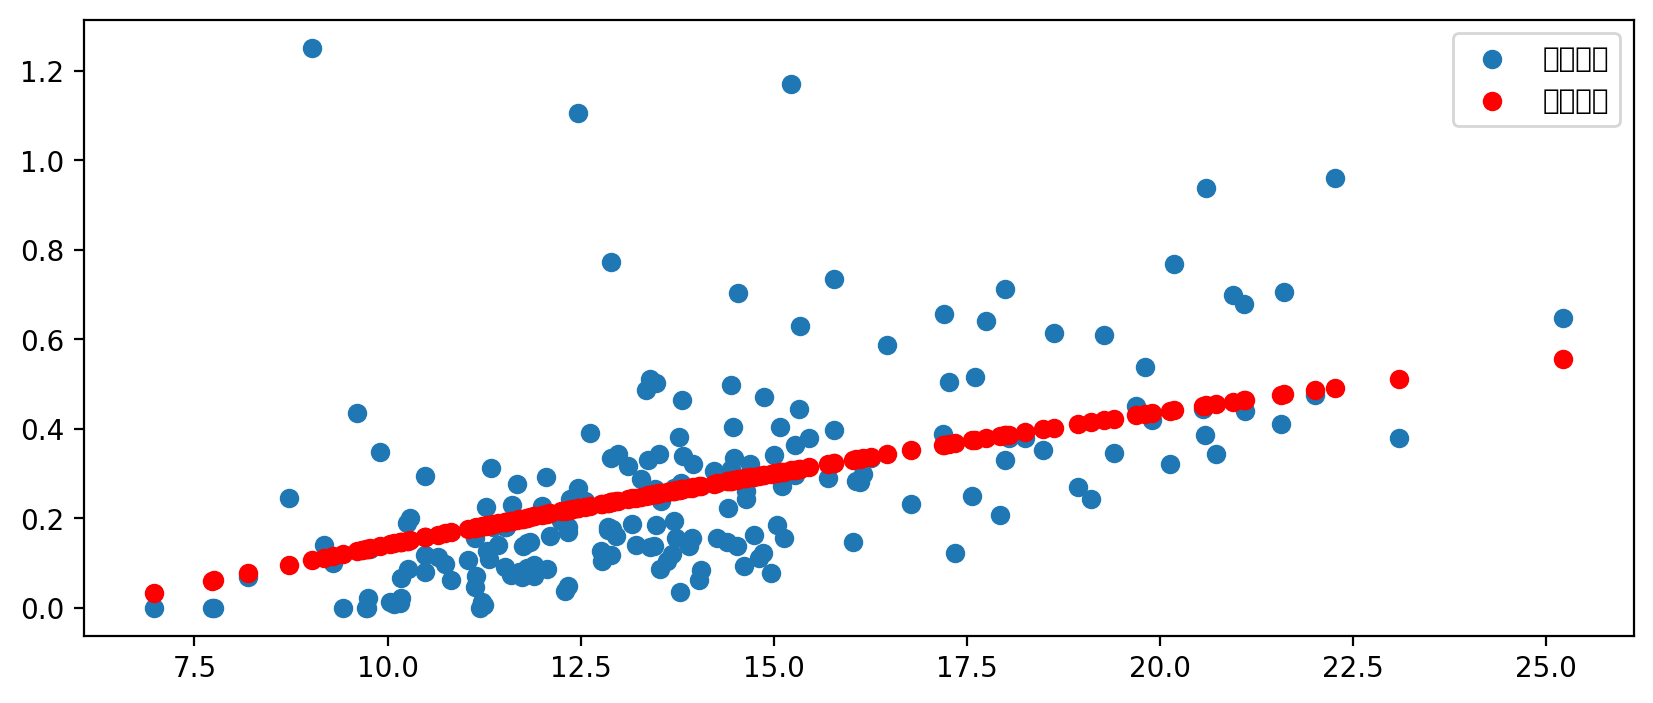

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test.iloc[:,0], y_test, label='實際資料')
plt.scatter(X_test.iloc[:,0], y_pred, c='r', label='預測結果')
plt.legend();
# plot_chinese(ax)